In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, lognorm, uniform, norm
from scipy.linalg import cholesky
from scipy.optimize import minimize
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

After importing all necesssary libraries, we create our vector space. 

In [2]:
x = np.linspace(0.01, 4, 200)
y = np.linspace(0.01, 6, 200)
X, Y = np.meshgrid(x, y)

We define our parameters

In [3]:
mu = np.array([np.log(1), np.log(2)])
sigma_1 = np.array([[0.5**2, 0], 
                    [0, 0.4**2]])
sigma_2 = np.array([[0.5**2, 0.5*0.4*0.5], 
                    [0.5*0.5*0.4, 0.4**2]])

We define out bivariate lognormal pdf function.

In [4]:
def bi_lognormal_pdf(x, y, mu, sigma):
    if np.any(x<=0) or np.any(y<=0):
        return np.zeros_like(x)
    z = np.stack([np.log(x), np.log(y)], axis=-1)
    bivariate_normal = multivariate_normal(mean=mu, cov=sigma)
    return bivariate_normal.pdf(z) / (x * y)

In [5]:
p1 = bi_lognormal_pdf(X, Y, mu, sigma_1)
p2 = bi_lognormal_pdf(X, Y, mu, sigma_2)

P4. a) After creating a bivariate log normal function, we can now plot them. I created 3 plots for each distribution p1(x, y) and p2(x, y). One plot shows surface plot, contours and marginall distributions. The other two are the surface and contour plots respectively. 

1 big plot.

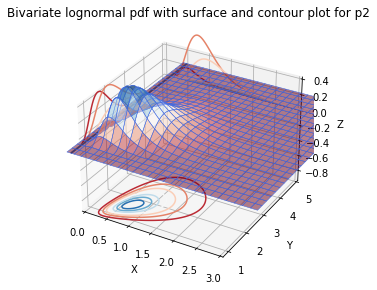

In [6]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, p2, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.5, cmap='RdBu')
ax.contour(X, Y, p2, zdir='z', offset=-0.9, cmap='RdBu')
ax.contour(X, Y, p2,zdir='x', offset=0.1, cmap='RdBu')
ax.contour(X, Y, p2, zdir='y', offset=5.1, cmap='RdBu')
ax.set(xlim=(0, 3), ylim=(0.8, 5), zlim=(-0.91, 0.4),
       xlabel='X', ylabel='Y', zlabel='Z')

ax.set_title("Bivariate lognormal pdf with surface and contour plot for p2")

# ax = plt.figure().add_subplot(projection='3d')
# ax.plot_surface(X, Y, p1, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
#                 alpha=0.5, cmap='RdBu')
# ax.contour(X, Y, p1, zdir='z', offset=-0.9, cmap='RdBu')
# ax.contour(X, Y, p1,zdir='x', offset=0.1, cmap='RdBu')
# ax.contour(X, Y, p1, zdir='y', offset=5.1, cmap='RdBu')
# ax.set(xlim=(0, 3), ylim=(0.8, 5), zlim=(-0.91, 0.4),
#        xlabel='X', ylabel='Y', zlabel='Z')

# ax.set_title("Bivariate lognormal pdf with surface and contour plot for p1")


plt.tight_layout()
plt.show()

Surface plot.

Text(0.5, 0.92, 'Bivariate lognormal pdf with surface plot for p2')

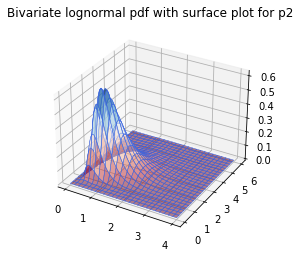

In [7]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, p2, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.5, cmap='RdBu')

ax.set_title("Bivariate lognormal pdf with surface plot for p2")

# ax = plt.figure().add_subplot(projection='3d')
# ax.plot_surface(X, Y, p1, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
#                 alpha=0.5, cmap='RdBu')
# ax.set_title("Bivariate lognormal pdf with surface plot for p1")

[(0.0, 3.0),
 (0.0, 5.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Bivariate lognormall contour plot p2')]

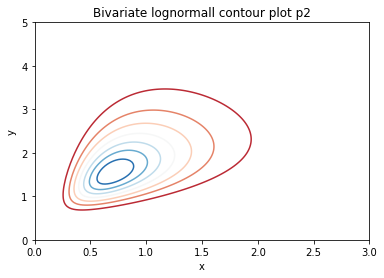

In [8]:
fig, ax = plt.subplots()
ax.contour(X, Y, p2, cmap='RdBu')
ax.set(xlim=(0, 3), ylim=(0, 5),
       xlabel='x', ylabel='y', title='Bivariate lognormall contour plot p2')
# fig, ax = plt.subplots()
# ax.contour(X, Y, p1, cmap='RdBu')
# ax.set(xlim=(0, 3), ylim=(0, 5),
#        xlabel='x', ylabel='y', title='Bivariate lognormall contour plot p1')

P4. b) The marginal distributions to respect to x for both p1(x) and p2(x) will be the same as they both have the same mu_x and var_x. Therefore, they will ovevrlap.

In [9]:
mu_x1 = np.exp(mu[0])
mu_x2 = np.exp(mu[0])
sigma_x1 = np.sqrt(sigma_1[0, 0])
sigma_x2 = np.sqrt(sigma_2[0, 0])

log1 = lognorm(s=sigma_x1, scale=mu_x1)
log2 = lognorm(s=sigma_x2, scale=mu_x2)

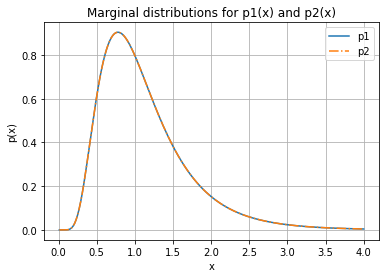

In [10]:
fig, ax1 = plt.subplots()
ax1.plot(x, log1.pdf(x), label='p1')
ax1.plot(x, log2.pdf(x), linestyle='-.', label='p2')
ax1.set(xlabel='x', ylabel='p(x)', title='Marginal distributions for p1(x) and p2(x)')
ax1.grid()
ax1.legend()

P4. c-d) For the conditional of bivariate gaussian we have to calculate the mean and standard deviation based on the conditional. Since p1 is uncorrelated to p2, its pdf willl not change for p1(x|y=1) and p1(x|y=2). In contrast, p2(x|y) does have an influence on pdf.

In [44]:
mu_x2_c = mu[0] + (sigma_2[0, 1] / sigma_2[1, 1]) * (np.log(1) - mu[1])
sigma_x2_c = sigma_2[0, 0] - ((sigma_2[0, 1]) ** 2) / sigma_2[1, 1]
cond1 = lognorm(s=np.sqrt(sigma_x2_c), scale=np.exp(mu_x2_c))

mu_x2_2c = mu[0] + (sigma_2[0, 1] / sigma_2[1, 1]) * (np.log(2) - mu[1])

cond1 = lognorm(s=np.sqrt(sigma_x2_c), scale=np.exp(mu_x2_c))
cond2 = lognorm(s=np.sqrt(sigma_x2_c), scale=np.exp(mu_x2_2c))

P4. c-d)

[Text(0.5, 0, 'x'), Text(0, 0.5, 'p(x|y)')]

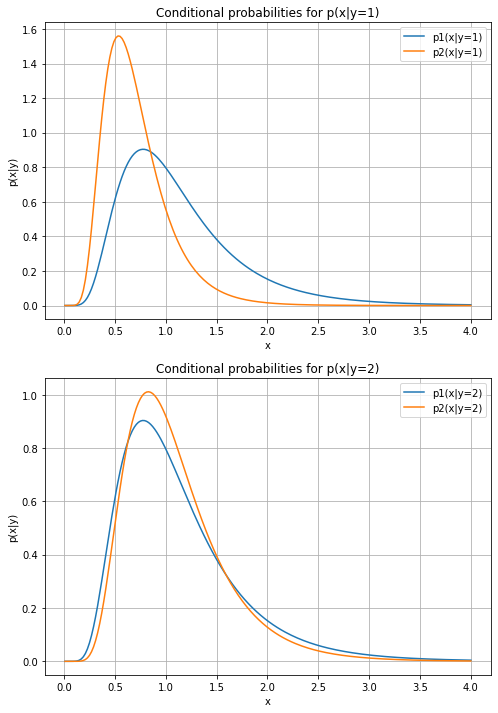

In [311]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[8,12])

ax1.plot(x, log1.pdf(x), label=f'p1(x|y=1)')
ax1.plot(x, cond1.pdf(x), label=f'p2(x|y=1)')
ax1.set_title('Conditional probabilities for p(x|y=1)')
ax1.grid()
ax1.legend()
ax1.set(xlabel='x', ylabel='p(x|y)')

ax2.plot(x, log1.pdf(x), label=f'p1(x|y=2)')
ax2.plot(x, cond2.pdf(x), label=f'p2(x|y=2)')
ax2.grid()
ax2.set_title('Conditional probabilities for p(x|y=2)')
ax2.legend()
ax2.set(xlabel='x', ylabel='p(x|y)')

P4. e) For mvrnd and rnd + cholesky, the functions give a random sample from a normal gaussian distribution. However, to convert our samples to our log normal space, we have to apply the function f(samples) = exp(samples) = logx,y of samples.

[Text(0.5, 1.0, 'rnd generated samples for p2')]

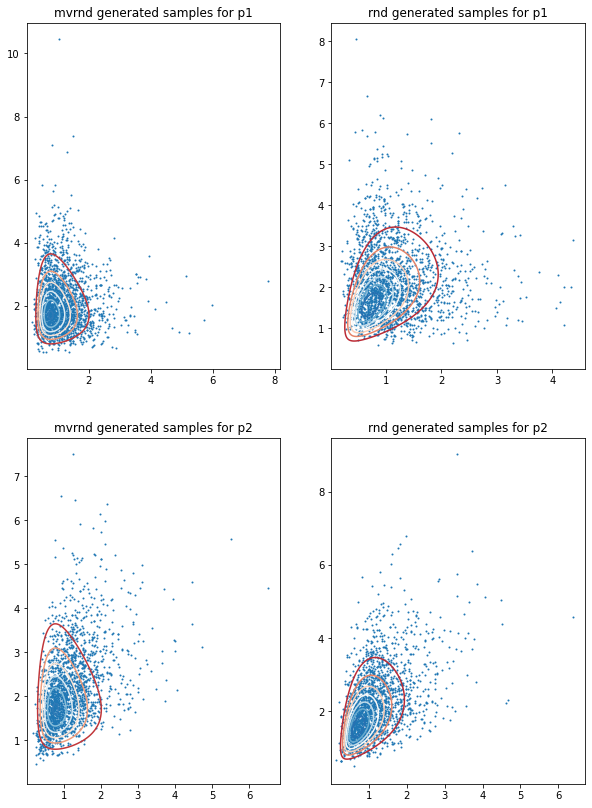

In [12]:
#mvrnd generated samples
samples1 = np.random.multivariate_normal(mu, sigma_1, 2000)
samples2 = np.random.multivariate_normal(mu, sigma_2, 2000)
samples1 = np.exp(samples1)
samples2 = np.exp(samples2)

# plt.figure()
# plt.subplot(1,2,1)
# plt.plot(samples1[:,0], samples1[:,1], 'o', markersize=1)
# plt.title('mvrnd generated samples for p1')
# plt.xlabel('x'); plt.ylabel('y')
# plt.subplot(1,2,2)
# plt.plot(samples2[:,0], samples2[:,1], 'o', markersize=1)
# plt.title('mvrnd generated samples for p2')
# plt.xlabel('x'); plt.ylabel('y')

#rnd samples

L1 = np.linalg.cholesky(sigma_1)
L2 = np.linalg.cholesky(sigma_2)

samples1_1 = mu[:, None] + L1 @ np.random.randn(2, 2000)
samples1_1 = np.exp(samples1_1.T)

samples2_2 = mu[:, None] + L2 @ np.random.randn(2, 2000)
samples2_2 = np.exp(samples2_2.T)

fig, axs = plt.subplots(2, 2, figsize=[10, 14])
axs[0,0].scatter(samples1[:,0], samples1[:,1], s=1)
axs[0,0].contour(X, Y, p1, cmap='RdBu', )
axs[0,0].set(title='mvrnd generated samples for p1')
axs[1,0].contour(X, Y, p1, cmap='RdBu')
axs[1,0].scatter(samples2[:,0], samples2[:,1], s=1)
axs[1,0].set(title='mvrnd generated samples for p2')
axs[0,1].scatter(samples1_1[:,0], samples1_1[:,1], s=1)
axs[0,1].contour(X, Y, p2, cmap='RdBu')
axs[0,1].set(title='rnd generated samples for p1')
axs[1,1].scatter(samples2_2[:,0], samples2_2[:,1], s=1)
axs[1,1].contour(X, Y, p2, cmap='RdBu')
axs[1,1].set(title='rnd generated samples for p2')

P4. f) Unlike in other questions, here I explicit its random seed number for replicability. The theoretical mean and variance are calculated according to the definition of E[x] and Var[x] for log normal distributions. Afterwards, we plot the ratios and observe how the true sample meaan and variance approximate its theoretical value.

In [24]:
np.random.seed(2)

theoretical_meanx = np.exp(mu[0] + sigma_1[0, 0] / 2)
theoretical_varx = (np.exp(sigma_1[0, 0]) - 1) * (np.exp(2 * mu[0] + sigma_1[0, 0]))
print(theoretical_meanx, theoretical_varx)

#Var[X] = exp(2μ + σ²) * (exp(σ²) - 1).

N_space = np.logspace(1, 6, 11, dtype=int)

N_space.shape
quotients = []

for i in N_space:
    Z = mu[:, None] + L1 @ np.random.randn(2, i)
    Z = np.exp(Z.T)
    mean = np.mean(Z[:, 0])
    var = np.var(Z[:, 0], ddof=1)
    quotients.append([mean/theoretical_meanx, var/theoretical_varx])

quotients = np.array(quotients)

1.1331484530668263 0.3646958540123865


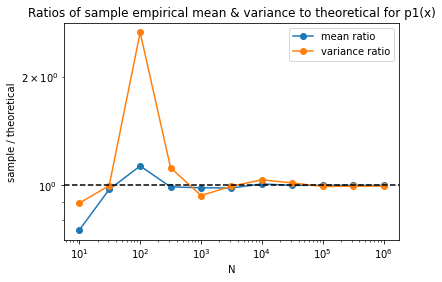

In [25]:
plt.figure()
plt.loglog(N_space, quotients[:, 0], '-o', label='mean ratio')
plt.loglog(N_space, quotients[:, 1], '-o', label='variance ratio')
plt.axhline(1, color='k', linestyle='--')
plt.xlabel('N'); plt.ylabel('sample / theoretical'); plt.legend()
plt.title('Ratios of sample empirical mean & variance to theoretical for p1(x)')
plt.show()